# Resilience

$$ Resilience = \frac{Readiness*(1-Vulnerability)}{Readiness + (1- Vulnerability)}$$

## Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.base import TransformerMixin, BaseEstimator

In [2]:
import folium

In [3]:
#path = '/Users/utilisateur/Documents/Le_Wagon/Resilience/CDP-Cities-KPI.csv'
path = '../raw_data/CDP-Cities-KPI.csv'
kpi_data = pd.read_csv(path)

In [4]:
kpi = kpi_data.drop_duplicates(subset = 'Account.Number', keep = 'first', inplace = False).copy().reset_index()
kpi = kpi.drop('index', axis = 1)

In [5]:
kpi_new = kpi.copy()

In [6]:
kpi

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
5             6                  2020           54519   
6             7                  2020           35897   
7             8                  2020           68383   
8             9                  2020           59563   
9            10                  2020           31165   
10           12                  2020           49347   
11           14                  2020          848408   
12           15                  2020           60271   
13           16                  2020           54386   
14           17                  2020          840018   
15           18                  2020          845302   
16           19                  2020           59572   
17           21                  2020           35859   
18           22                  2020           50354   
19           23                  2020           50674   
20           24                  2020           31167   
21           25                  2020            3422   
22           26                  2020           60117   
23           27                  2020           49342   
24           28                  2020           31108   
25           29                  2020           50154   
26           30                  2020           58310   
27           31                  2020          845309   
28           32                  2020           50220   
29           33                  2020           59165   
..          ...                   ...             ...   
536         585                  2020           50361   
537         586                  2020           31115   
538         587                  2020           37261   
539         588                  2020           60267   
540         589                  2020           60126   
541         590                  2020           35870   
542         591                  2020           63941   
543         592                  2020           73706   
544         593                  2020           68388   
545         594                  2020           36286   
546         595                  2020          826429   
547         596                  2020          834083   
548         597                  2020          831999   
549         598                  2020           73750   
550         599                  2020           74546   
551         600                  2020           54110   
552         601                  2020          839666   
553         602                  2020           31111   
554         604                  2020           54389   
555         605                  2020           54579   
556         606                  2020           31052   
557         607                  2020           35449   
558         608                  2020           59124   
559         609                  2020           58871   
560         610                  2020          833284   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization  \
0    Metropolitan Government of Nashville and David...   
1                          Prefeitura de Fernandópolis   
2                                   Prefeitura Niterói   
3                                       City of Gdynia   
4                                       City of Denver   
5                                         City of Lund   
6                             Municipality of Campinas   
7     

## Computing the targets

### Sustainability.Targets.Master.Planning

"Yes"=3, 
"In progress"=2,
"Intending to incorporate in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0
"NaN"=0

In [7]:
def note_sustainability_target(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to incorporate in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [8]:
def minmax_sus(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [9]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [10]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(minmax_sus)

### Risk.Assessment.Actions","Adaptation.Plan" ...

"Yes"=3, 
"In progress"=2,
"Intending to undertake in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0

In [11]:
def note_bunch(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to undertake in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [12]:
def minmax_bunch(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [13]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    kpi_new[i] = kpi_new[i].apply(note_sustainability_target)
    kpi_new[i] = kpi_new[i].apply(minmax_bunch)

In [14]:
kpi_new[["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]]

Risk.Assessment.Actions  Adaptation.Plan  City.Wide.Emissions.Inventory  \
0                   1.000000         0.666667                       1.000000   
1                   0.000000         0.000000                       1.000000   
2                   1.000000         1.000000                       1.000000   
3                   1.000000         1.000000                       0.000000   
4                   1.000000         1.000000                       1.000000   
5                   1.000000         1.000000                       1.000000   
6                   1.000000         0.666667                       1.000000   
7                   0.666667         0.000000                       0.000000   
8                   1.000000         1.000000                       1.000000   
9                   1.000000         1.000000                       1.000000   
10                  1.000000         0.000000                       1.000000   
11                  1.000000         0.000000                       0.000000   
12                  0.000000         0.000000                       0.000000   
13                  1.000000         1.000000                       1.000000   
14                  1.000000         0.000000                       0.666667   
15                  0.000000         0.000000                       0.000000   
16                  1.000000         1.000000                       1.000000   
17                  1.000000         1.000000                       1.000000   
18                  1.000000         1.000000                       1.000000   
19                  1.000000         1.000000                       1.000000   
20                  1.000000         1.000000                       1.000000   
21                  1.000000         1.000000                       1.000000   
22                  0.000000         0.000000                       0.000000   
23                  1.000000         1.000000                       1.000000   
24                  1.000000         1.000000                       1.000000   
25                  1.000000         1.000000                       1.000000   
26                  0.000000         0.000000                       1.000000   
27                  1.000000         0.666667                       0.000000   
28                  1.000000         1.000000                       1.000000   
29                  1.000000         1.000000                       1.000000   
..                       ...              ...                            ...   
536                 1.000000         1.000000                       1.000000   
537                 1.000000         1.000000                       1.000000   
538                 0.000000         1.000000                       0.000000   
539                 0.000000         0.000000                       0.666667   
540                 1.000000         1.000000                       1.000000   
541                 1.000000         1.000000                       1.000000   
542                 1.000000         1.000000                       1.000000   
543                 1.000000         1.000000                       1.000000   
544                 0.000000         0.000000                       0.666667   
545                 1.000000         1.000000                       0.000000   
546                 1.000000         0.000000                       0.000000   
547                 1.000000         1.000000                       1.000000   
548                 1.000000         0.666667                       1.000000   
549                 1.000000         1.000000                       0.666667   
550                 1.000000         1.000000                       1.000000   
551                 1.000000         1.000000                       1.000000   
552                 1.000000         1.000000                       1.000000   
553                 1.000000         1.000000                       1.000000   
554  

### Low.Zero.Emission.Zone","Food.Consumption.Policies

"Yes" = 1
"No" = 0
"Do not know" =0
"NaN" = 0

In [15]:
def note_low_food(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [16]:
def minmax_binaire(x):
    mini = 0
    maxi = 1
    return (x-mini)/(maxi-mini)

In [17]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(note_low_food)

In [18]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(minmax_binaire)

In [19]:
kpi_new['Food.Consumption.Policies'] = kpi_new['Food.Consumption.Policies'].apply(note_low_food)

In [20]:
kpi_new['Food.Consumption.Policies']= kpi_new['Food.Consumption.Policies'].apply(minmax_binaire)

### GHG.Emissions.Reductions.Targets

"1"= "Base year emissions (absolute) target","Base year intensity target","Baseline scenario (business as usual) target","Fixed level target"
"0" = "No target"
"0" = "NaN"

In [21]:
def note_emi_red(x):
    if x == "Base year emissions (absolute) target":
        return 1
    elif x == "Base year intensity target":
        return 1
    elif x == "Baseline scenario (business as usual) target":
        return 1
    elif x == "Fixed level target":
        return 1
    elif x == "No target":
        return 0
    else:
        return 0

In [22]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [23]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(minmax_binaire)

### GHG.Emissions.Evolution

"2"="Decreased",
"1"=  "Stayed the same",
"0" = "Do not know","This is our first year of calculation", "Increased"
"0" = "NaN"

In [24]:
def note_emi_evo(x):
    if x == "Decreased":
        return 2
    elif x == "Stayed the same":
        return 1
    elif x == "Increased":
        return 0
    elif x == "Do not know":
        return 0
    elif x == "This is our first year of calculation":
        return 0
    else:
        return 0

In [25]:
def minmax_em_evo(x):
    mini = 0
    maxi = 2
    return (x-mini)/(maxi-mini)

In [26]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [27]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(minmax_em_evo)

### Electricity.Source.Renewable

In [28]:
def minmax_energy(x):
    if np.isnan(x):
        x = 0
    mini = 0
    maxi = 100
    return (x-mini)/(maxi-mini)

In [29]:
kpi_new['Electricity.Source.Renewable'] = kpi_new['Electricity.Source.Renewable'].apply(minmax_energy)

## City.Readiness.Index

In [30]:
kpi_new['City.Readiness.Index']= kpi_new[["Sustainability.Targets.Master.Planning", "Risk.Assessment.Actions",
                                            "Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
                                            "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration",
                                            "Renewable.Energy.Target","Energy.Efficnecy.Target",
                                            "Water.Resource.Management.strategy","Low.Zero.Emission.Zone",
                                            "GHG.Emissions.Evolution","GHG.Emissions.Reductions.Targets",
                                            "Electricity.Source.Renewable", "Food.Consumption.Policies",
                                            "City.Wide.Emissions.Inventory"]].mean(axis =1)

## Vulnerability Index

In [31]:
kpi_new['Risk.Health.System'] = kpi_new['Risk.Health.System'].apply(note_low_food)

In [32]:
kpi_new['Risk.Health.System'] = kpi_new['Risk.Health.System'].apply(minmax_binaire)

In [33]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [34]:
kpi_new['Potable.Water.Supply.Percent'] = kpi_new['Potable.Water.Supply.Percent'].apply(cleanan)

In [35]:
kpi_new['Potable.Water.Supply.Vulnerability'] = 100-kpi_new['Potable.Water.Supply.Percent']

In [36]:
kpi_new['Potable.Water.Supply.Vulnerability'] = kpi_new['Potable.Water.Supply.Vulnerability'].apply(minmax_energy)

In [37]:
def minmax_hazard(x):
    mini = 0
    maxi = 352
    return (x-mini)/(maxi-mini)

In [38]:
kpi_new['Hazards.Exposure.Level'] = kpi_new['Hazards.Exposure.Level'].apply(cleanan)

In [39]:
kpi_new['Hazards.Exposure.Level'] = kpi_new['Hazards.Exposure.Level'].apply(minmax_hazard)

In [40]:
def minmax_adaptation(x):
    mini = 0
    maxi = 8
    return (x-mini)/(maxi-mini)

In [41]:
kpi_new['Adaptation.Challenges.Level'] = kpi_new['Adaptation.Challenges.Level'].apply(cleanan)

In [42]:
kpi_new['Adaptation.Challenges.Index'] = kpi_new['Adaptation.Challenges.Level'].apply(minmax_adaptation)

In [43]:
kpi_new['Sensitivity.Index']=(kpi_new['Risk.Health.System'] + kpi_new['Potable.Water.Supply.Vulnerability'])/2

In [44]:
kpi_new['Vulnerability']=(kpi_new['Hazards.Exposure.Level']+kpi_new['Adaptation.Challenges.Index']+kpi_new['Sensitivity.Index'])/3

#### Scatterplot regarding the Health Systems by Country

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

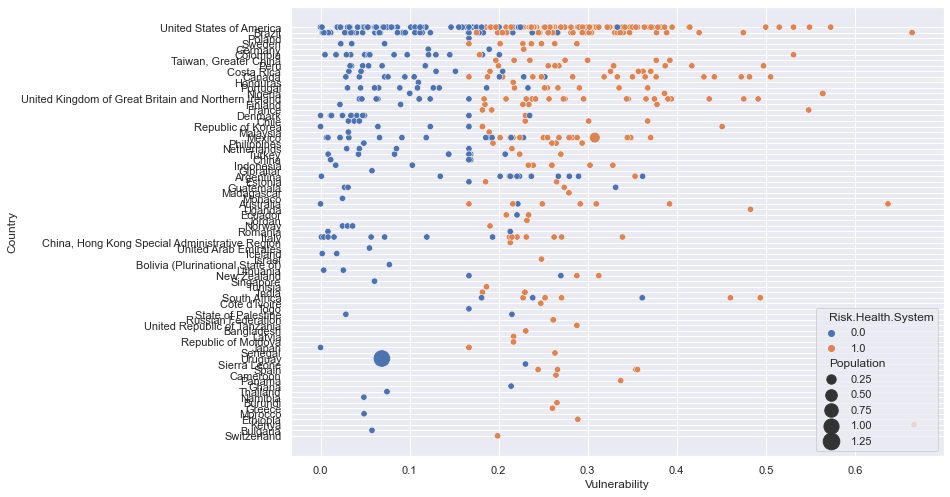

In [46]:
sns.scatterplot(y=kpi_new['Country'],x = kpi_new['Vulnerability'],size=kpi_new['Population'],hue=kpi_new['Risk.Health.System'],sizes=(40, 300));

## Correlation between our two KPI

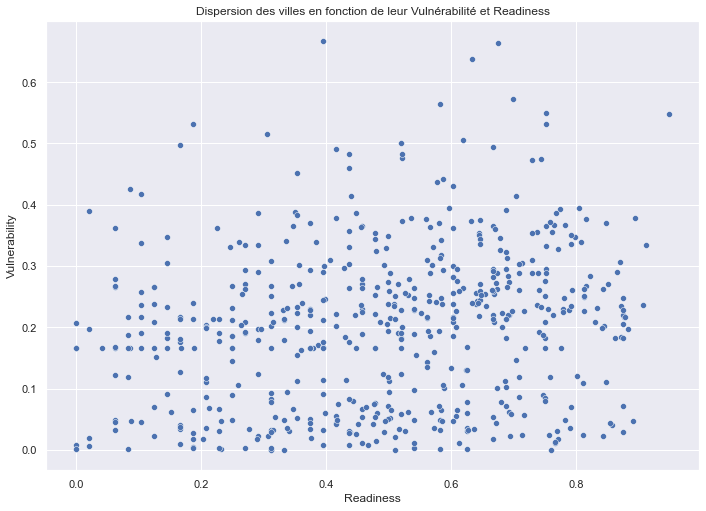

In [47]:
sc = sns.scatterplot(x = kpi_new['City.Readiness.Index'], y = kpi_new['Vulnerability'])
sc.set_title('Dispersion des villes en fonction de leur Vulnérabilité et Readiness')
sc.set_xlabel('Readiness');
plt.savefig('scatter');

#### Scatter plot of Vulnerability and Readiness

In [48]:
Ready_Vulnerability = px.scatter(kpi_new, x = 'City.Readiness.Index', y = 'Vulnerability', hover_data=['Organization'], labels = {'City.Readiness.Index': 'Readiness'})

In [49]:
Ready_Vulnerability

No clear linear relation between the Readiness and the Vulnerability of a city.

In [50]:
kpi_new

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
5             6                  2020           54519   
6             7                  2020           35897   
7             8                  2020           68383   
8             9                  2020           59563   
9            10                  2020           31165   
10           12                  2020           49347   
11           14                  2020          848408   
12           15                  2020           60271   
13           16                  2020           54386   
14           17                  2020          840018   
15           18                  2020          845302   
16           19                  2020           59572   
17           21                  2020           35859   
18           22                  2020           50354   
19           23                  2020           50674   
20           24                  2020           31167   
21           25                  2020            3422   
22           26                  2020           60117   
23           27                  2020           49342   
24           28                  2020           31108   
25           29                  2020           50154   
26           30                  2020           58310   
27           31                  2020          845309   
28           32                  2020           50220   
29           33                  2020           59165   
..          ...                   ...             ...   
536         585                  2020           50361   
537         586                  2020           31115   
538         587                  2020           37261   
539         588                  2020           60267   
540         589                  2020           60126   
541         590                  2020           35870   
542         591                  2020           63941   
543         592                  2020           73706   
544         593                  2020           68388   
545         594                  2020           36286   
546         595                  2020          826429   
547         596                  2020          834083   
548         597                  2020          831999   
549         598                  2020           73750   
550         599                  2020           74546   
551         600                  2020           54110   
552         601                  2020          839666   
553         602                  2020           31111   
554         604                  2020           54389   
555         605                  2020           54579   
556         606                  2020           31052   
557         607                  2020           35449   
558         608                  2020           59124   
559         609                  2020           58871   
560         610                  2020          833284   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization  \
0    Metropolitan Government of Nashville and David...   
1                          Prefeitura de Fernandópolis   
2                                   Prefeitura Niterói   
3                                       City of Gdynia   
4                                       City of Denver   
5                                         City of Lund   
6                             Municipality of Campinas   
7     

## Initial DataFrame, a.k.a with the targets

In [51]:
city_index = kpi_new[['Account.Number', 'City.Readiness.Index', 'Vulnerability']].copy()

In [52]:
raw_index = pd.concat([kpi, city_index.drop('Account.Number', axis = 1)], axis =1 )

In [53]:
raw_index

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
5             6                  2020           54519   
6             7                  2020           35897   
7             8                  2020           68383   
8             9                  2020           59563   
9            10                  2020           31165   
10           12                  2020           49347   
11           14                  2020          848408   
12           15                  2020           60271   
13           16                  2020           54386   
14           17                  2020          840018   
15           18                  2020          845302   
16           19                  2020           59572   
17           21                  2020           35859   
18           22                  2020           50354   
19           23                  2020           50674   
20           24                  2020           31167   
21           25                  2020            3422   
22           26                  2020           60117   
23           27                  2020           49342   
24           28                  2020           31108   
25           29                  2020           50154   
26           30                  2020           58310   
27           31                  2020          845309   
28           32                  2020           50220   
29           33                  2020           59165   
..          ...                   ...             ...   
536         585                  2020           50361   
537         586                  2020           31115   
538         587                  2020           37261   
539         588                  2020           60267   
540         589                  2020           60126   
541         590                  2020           35870   
542         591                  2020           63941   
543         592                  2020           73706   
544         593                  2020           68388   
545         594                  2020           36286   
546         595                  2020          826429   
547         596                  2020          834083   
548         597                  2020          831999   
549         598                  2020           73750   
550         599                  2020           74546   
551         600                  2020           54110   
552         601                  2020          839666   
553         602                  2020           31111   
554         604                  2020           54389   
555         605                  2020           54579   
556         606                  2020           31052   
557         607                  2020           35449   
558         608                  2020           59124   
559         609                  2020           58871   
560         610                  2020          833284   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization  \
0    Metropolitan Government of Nashville and David...   
1                          Prefeitura de Fernandópolis   
2                                   Prefeitura Niterói   
3                                       City of Gdynia   
4                                       City of Denver   
5                                         City of Lund   
6                             Municipality of Campinas   
7     

#### Map to show three different kinds of cities according to their Readiness

In [54]:
def colorlabel(x):
    if x <= 0.33:
        return 'red'
    elif (x > 0.33) and (x <=0.66):
        return 'orange'
    elif x > 0.66 :
        return 'green'
    else:
        return 'black'

In [55]:
zoom_start = 2
m = folium.Map(location=[ 43.3,  5.4],zoom_start=zoom_start)

In [56]:
df = raw_index.copy()

In [57]:
for i in df.iterrows():
    couleur = colorlabel(i[1][58])
    lat=i[1][55]
    lon=i[1][56]
    txt=f'readiness score:{i[1][58]} \n vulnerability score:{i[1][59]} \n Orga:{i[1][3]}'
    
    #folium.Marker(
    folium.CircleMarker(
    
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
     
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color='gray'   
        
    
    ).add_to(m)

## Map of the cities split into three categories according to their Readiness

In [58]:
m

Red : Poorly Prepared to withstand a shock
Orange : Midly Prepared to withstand a shock
Green : Fully Prepared to withstand a shock

### Too many questions and features in our initial survey that lead to too many missing answers

### A need to decrease the number of questions for our survey to be more user-friendly and quicker to fill

### We therefore implemented a feature selection

## Selection of the Features to keep

### Feature selection according to features' importance when doing linear regressions

In [59]:
dummy_kpi = kpi_new.copy()
dummy_kpi['Dummy_Index'] = (dummy_kpi['Vulnerability'] + dummy_kpi['City.Readiness.Index'])/2
dummy_kpi['Resilience'] = ((1-dummy_kpi['Vulnerability']) * dummy_kpi['City.Readiness.Index'])/((1-dummy_kpi['Vulnerability']) + dummy_kpi['City.Readiness.Index'])

In [60]:
fig = px.scatter(dummy_kpi, x = dummy_kpi['City.Readiness.Index'], y = dummy_kpi['Resilience'], hover_data = ['Organization'])
fig.show()

In [61]:
Targets = px.scatter_3d(dummy_kpi, y ='City.Readiness.Index', z ='Vulnerability', x = 'Resilience', hover_name = 'Organization', labels = {'City.Readiness.Index':'Readiness'})

In [62]:
Targets.show()

In [63]:
X = kpi_new[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]

In [64]:
y1 = kpi_new['Vulnerability']
y2 = kpi_new['City.Readiness.Index']

#### Simple Linear Regression model for Vulnerability

Feature: 0, Score: 0.33333 Hazards.Exposure.Level
Feature: 1, Score: 0.16667 Risk.Health.System
Feature: 2, Score: 0.33333 Adaptation.Challenges.Index
Feature: 3, Score: 0.16667 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00000 Sustainability.Targets.Master.Planning
Feature: 5, Score: -0.00000 Risk.Assessment.Actions
Feature: 6, Score: -0.00000 Adaptation.Plan
Feature: 7, Score: -0.00000 GHG.Emissions.Consumption
Feature: 8, Score: -0.00000 GHG.Emissions.External.Verification
Feature: 9, Score: -0.00000 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: -0.00000 Opportunities.Collaboration
Feature: 11, Score: 0.00000 Renewable.Energy.Target
Feature: 12, Score: -0.00000 Energy.Efficnecy.Target
Feature: 13, Score: -0.00000 Water.Resource.Management.strategy
Feature: 14, Score: 0.00000 Low.Zero.Emission.Zone
Feature: 15, Score: 0.00000 GHG.Emissions.Evolution
Feature: 16, Score: 0.00000 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00000 Electricity.Source.R

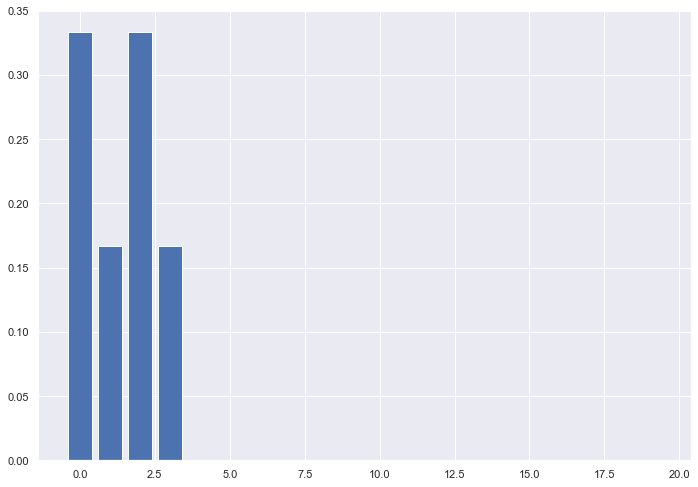

In [65]:
model = LinearRegression()
# fit the model
model.fit(X, y1)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

model = LinearRegression()
# fit the model
model.fit(X, y1)
# get importance
importance = model.coef_
# summarize feature importance
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.show()

#### Simple Linear Regression model for Readiness

model = LinearRegression()

model.fit(X, y2)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

model = LinearRegression()

model.fit(X, y2)
# get importance
importance = model.coef_
# summarize feature importance
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.show()

#### XGBoost Regression model for Vulnerability

Feature: 0, Score: 0.01378 Hazards.Exposure.Level
Feature: 1, Score: 0.87436 Risk.Health.System
Feature: 2, Score: 0.06443 Adaptation.Challenges.Index
Feature: 3, Score: 0.04348 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00011 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.00012 Risk.Assessment.Actions
Feature: 6, Score: 0.00009 Adaptation.Plan
Feature: 7, Score: 0.00005 GHG.Emissions.Consumption
Feature: 8, Score: 0.00012 GHG.Emissions.External.Verification
Feature: 9, Score: 0.00010 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.00007 Opportunities.Collaboration
Feature: 11, Score: 0.00051 Renewable.Energy.Target
Feature: 12, Score: 0.00057 Energy.Efficnecy.Target
Feature: 13, Score: 0.00019 Water.Resource.Management.strategy
Feature: 14, Score: 0.00003 Low.Zero.Emission.Zone
Feature: 15, Score: 0.00126 GHG.Emissions.Evolution
Feature: 16, Score: 0.00012 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00018 Electricity.Source.Renewable

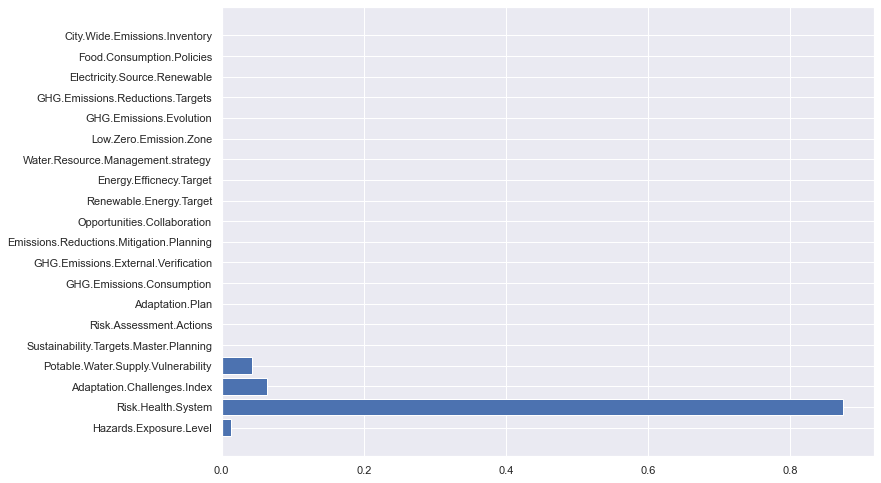

In [66]:
model = XGBRegressor()
# fit the model
model.fit(X, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.show()

#### Feature importance according to a XGBoost Regression 

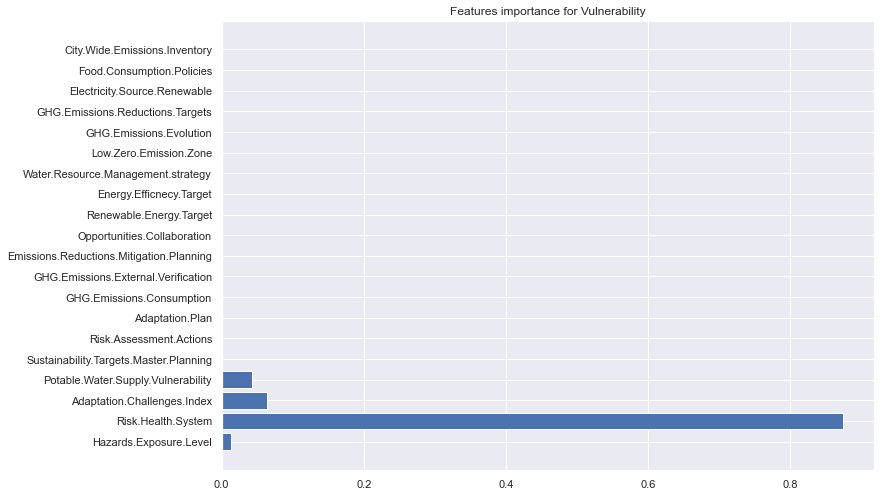

In [67]:
model = XGBRegressor()
# fit the model
model.fit(X, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.title('Features importance for Vulnerability')
plt.savefig('Vulnerability Selection Feature')


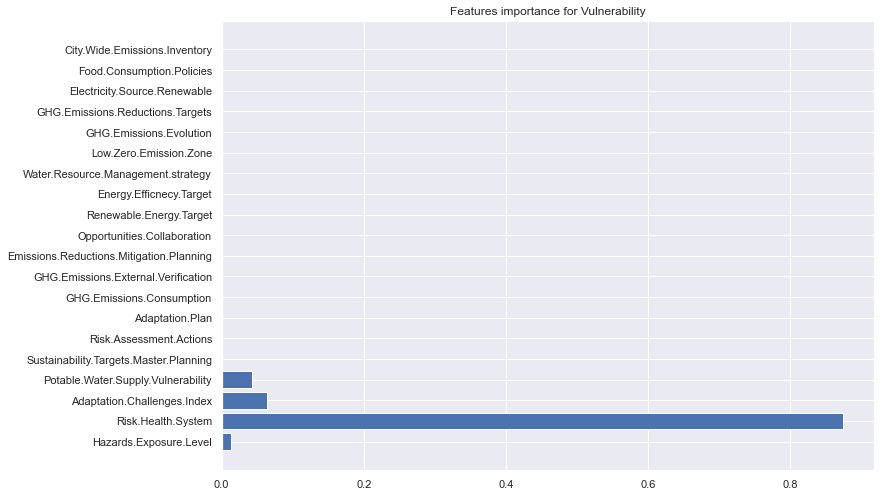

In [68]:
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.title('Features importance for Vulnerability');

#### XGBoost Regression model for Readiness

Feature: 0, Score: 0.00044 Hazards.Exposure.Level
Feature: 1, Score: 0.00019 Risk.Health.System
Feature: 2, Score: 0.00063 Adaptation.Challenges.Index
Feature: 3, Score: 0.00136 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.01144 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.02831 Risk.Assessment.Actions
Feature: 6, Score: 0.01389 Adaptation.Plan
Feature: 7, Score: 0.00727 GHG.Emissions.Consumption
Feature: 8, Score: 0.02998 GHG.Emissions.External.Verification
Feature: 9, Score: 0.31390 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.04261 Opportunities.Collaboration
Feature: 11, Score: 0.07606 Renewable.Energy.Target
Feature: 12, Score: 0.04936 Energy.Efficnecy.Target
Feature: 13, Score: 0.00893 Water.Resource.Management.strategy
Feature: 14, Score: 0.00815 Low.Zero.Emission.Zone
Feature: 15, Score: 0.02074 GHG.Emissions.Evolution
Feature: 16, Score: 0.25237 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00483 Electricity.Source.Renewable

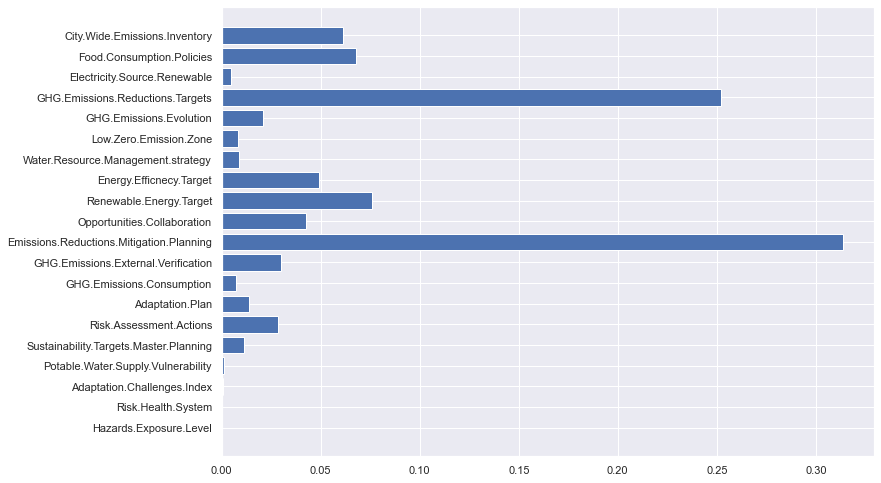

In [69]:
model = XGBRegressor()
# fit the model
model.fit(X, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v),f'{X.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.show()

Text(0.5, 1.0, 'Features importance for Readiness')

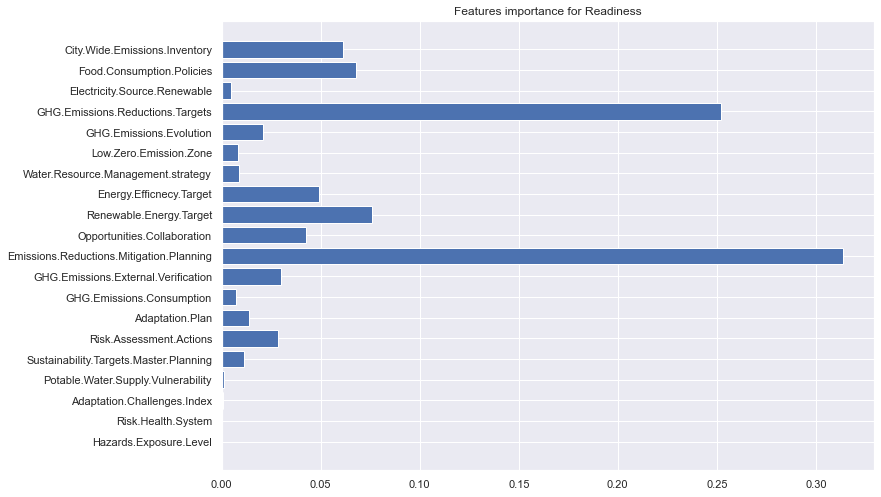

In [70]:
model = XGBRegressor()
# fit the model
model.fit(X, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v),f'{X.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.title('Features importance for Readiness')
#plt.savefig('Readiness Selection Feature')


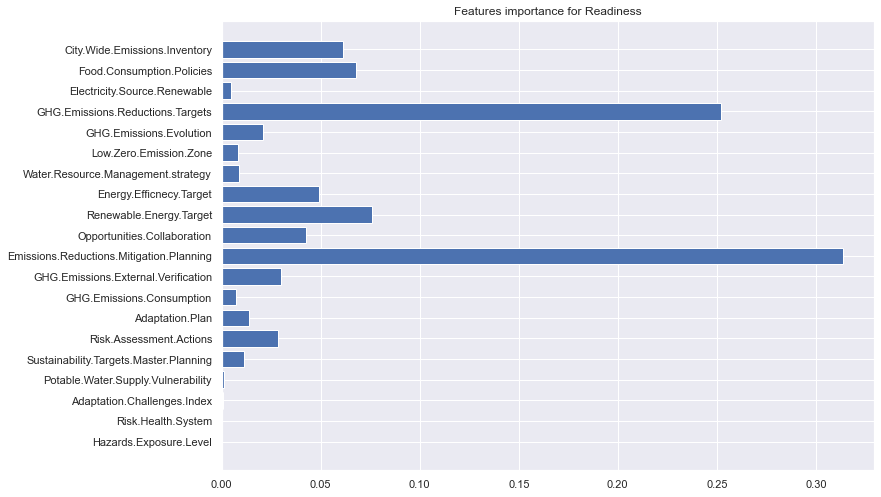

In [71]:
plt.barh([x for x in range(len(importance))], importance, tick_label = X.columns)
plt.title('Features importance for Readiness');


### Feature selection in regards to targets mixing Vulnerability and Readiness

In [72]:
X_dummy = dummy_kpi[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]
y_dummy1 = dummy_kpi['Dummy_Index']
y_dummy2 = dummy_kpi['Resilience']

#### Simple Linear Regression model for the simple mean of Readiness and Vulnerability

Feature: 0, Score: 0.16667 Hazards.Exposure.Level
Feature: 1, Score: 0.08333 Risk.Health.System
Feature: 2, Score: 0.16667 Adaptation.Challenges.Index
Feature: 3, Score: 0.08333 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.03125 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.03125 Risk.Assessment.Actions
Feature: 6, Score: 0.03125 Adaptation.Plan
Feature: 7, Score: 0.03125 GHG.Emissions.Consumption
Feature: 8, Score: 0.03125 GHG.Emissions.External.Verification
Feature: 9, Score: 0.03125 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.03125 Opportunities.Collaboration
Feature: 11, Score: 0.03125 Renewable.Energy.Target
Feature: 12, Score: 0.03125 Energy.Efficnecy.Target
Feature: 13, Score: 0.03125 Water.Resource.Management.strategy
Feature: 14, Score: 0.03125 Low.Zero.Emission.Zone
Feature: 15, Score: 0.03125 GHG.Emissions.Evolution
Feature: 16, Score: 0.03125 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.03125 Electricity.Source.Renewable

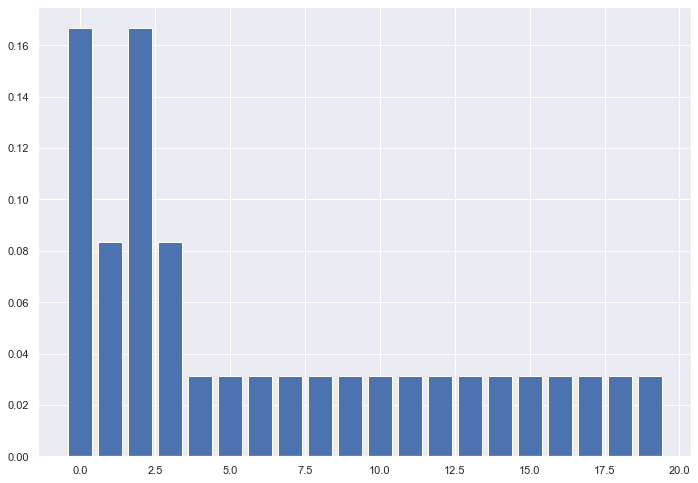

In [74]:
model = LinearRegression()
# fit the model
model.fit(X_dummy, y_dummy1)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XGBoost Regression model for the simple mean of Readiness and Vulnerability

Feature: 0, Score: 0.00393 Hazards.Exposure.Level
Feature: 1, Score: 0.32372 Risk.Health.System
Feature: 2, Score: 0.01204 Adaptation.Challenges.Index
Feature: 3, Score: 0.00286 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00533 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.01556 Risk.Assessment.Actions
Feature: 6, Score: 0.06612 Adaptation.Plan
Feature: 7, Score: 0.01029 GHG.Emissions.Consumption
Feature: 8, Score: 0.01989 GHG.Emissions.External.Verification
Feature: 9, Score: 0.21819 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.02390 Opportunities.Collaboration
Feature: 11, Score: 0.03052 Renewable.Energy.Target
Feature: 12, Score: 0.01806 Energy.Efficnecy.Target
Feature: 13, Score: 0.00519 Water.Resource.Management.strategy
Feature: 14, Score: 0.00665 Low.Zero.Emission.Zone
Feature: 15, Score: 0.01791 GHG.Emissions.Evolution
Feature: 16, Score: 0.14327 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00420 Electricity.Source.Renewable

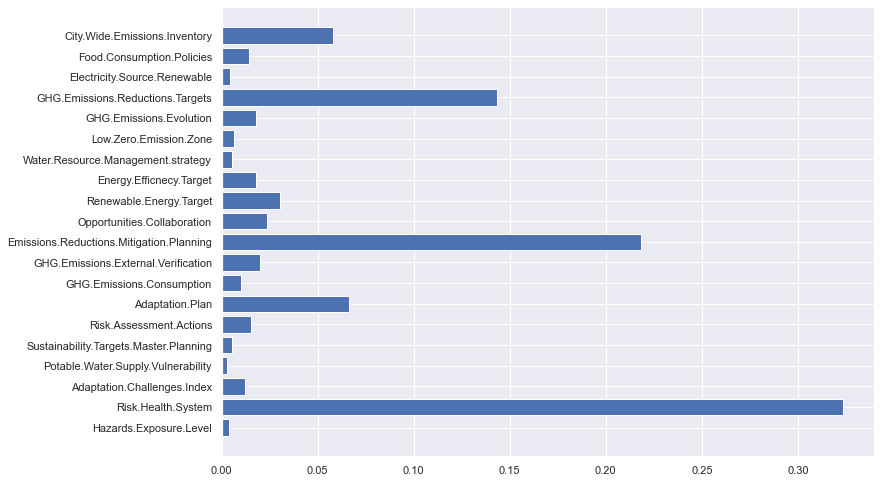

In [75]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X_dummy.columns)
plt.show()

#### Simple Linear Regression model for the Harmonic mean of Readiness and Vulnerability

Feature: 0, Score: 0.00095 Hazards.Exposure.Level
Feature: 1, Score: 0.16667 Risk.Health.System
Feature: 2, Score: 0.00000 Sustainability.Targets.Master.Planning
Feature: 3, Score: -0.00000 Risk.Assessment.Actions
Feature: 4, Score: -0.00000 Adaptation.Plan
Feature: 5, Score: -0.00000 GHG.Emissions.Consumption
Feature: 6, Score: -0.00000 GHG.Emissions.External.Verification
Feature: 7, Score: 0.00000 Emissions.Reductions.Mitigation.Planning
Feature: 8, Score: 0.00000 Opportunities.Collaboration
Feature: 9, Score: -0.00000 Renewable.Energy.Target
Feature: 10, Score: 0.00000 Energy.Efficnecy.Target
Feature: 11, Score: 0.00000 Water.Resource.Management.strategy
Feature: 12, Score: 0.00000 Low.Zero.Emission.Zone
Feature: 13, Score: 0.00000 GHG.Emissions.Evolution
Feature: 14, Score: -0.00000 GHG.Emissions.Reductions.Targets
Feature: 15, Score: 0.00000 Electricity.Source.Renewable
Feature: 16, Score: 0.00000 Food.Consumption.Policies
Feature: 17, Score: -0.00000 City.Wide.Emissions.Inventory

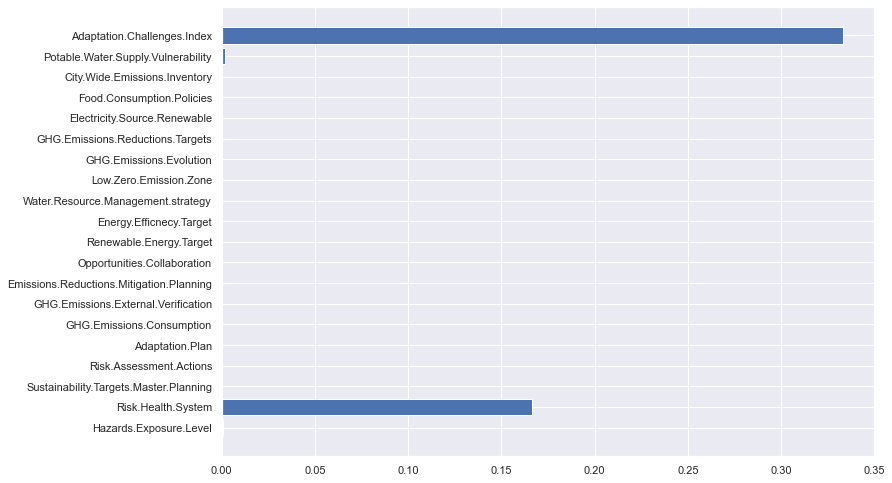

In [178]:
model = LinearRegression()
# fit the model
model.fit(X_dummy, y_dummy2)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X_dummy.columns)
plt.show()

#### XGBoost Regression model for the Harmonic mean of Readiness and Vulnerability

Feature: 0, Score: 0.00118 Hazards.Exposure.Level
Feature: 1, Score: 0.01013 Risk.Health.System
Feature: 2, Score: 0.01113 Adaptation.Challenges.Index
Feature: 3, Score: 0.00373 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.02487 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.02228 Risk.Assessment.Actions
Feature: 6, Score: 0.05139 Adaptation.Plan
Feature: 7, Score: 0.00367 GHG.Emissions.Consumption
Feature: 8, Score: 0.01286 GHG.Emissions.External.Verification
Feature: 9, Score: 0.23474 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.05263 Opportunities.Collaboration
Feature: 11, Score: 0.02973 Renewable.Energy.Target
Feature: 12, Score: 0.01928 Energy.Efficnecy.Target
Feature: 13, Score: 0.01419 Water.Resource.Management.strategy
Feature: 14, Score: 0.00751 Low.Zero.Emission.Zone
Feature: 15, Score: 0.01266 GHG.Emissions.Evolution
Feature: 16, Score: 0.34936 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00344 Electricity.Source.Renewable

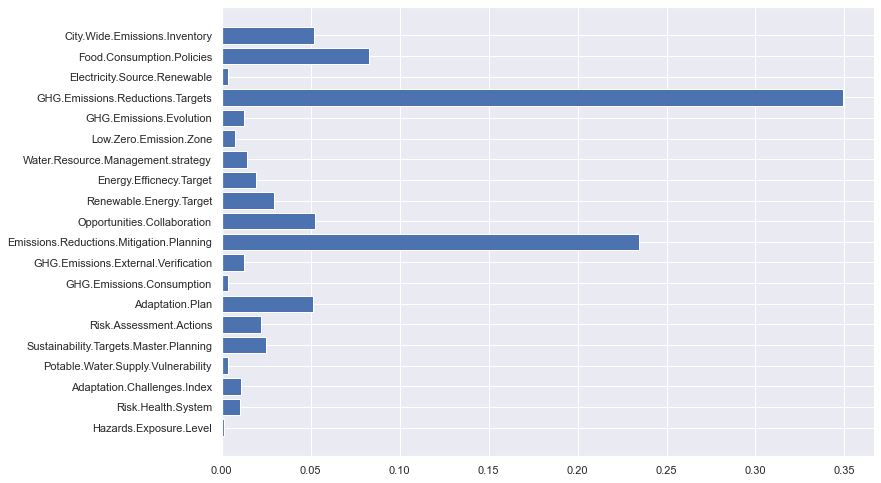

In [77]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X_dummy.columns)
plt.show()

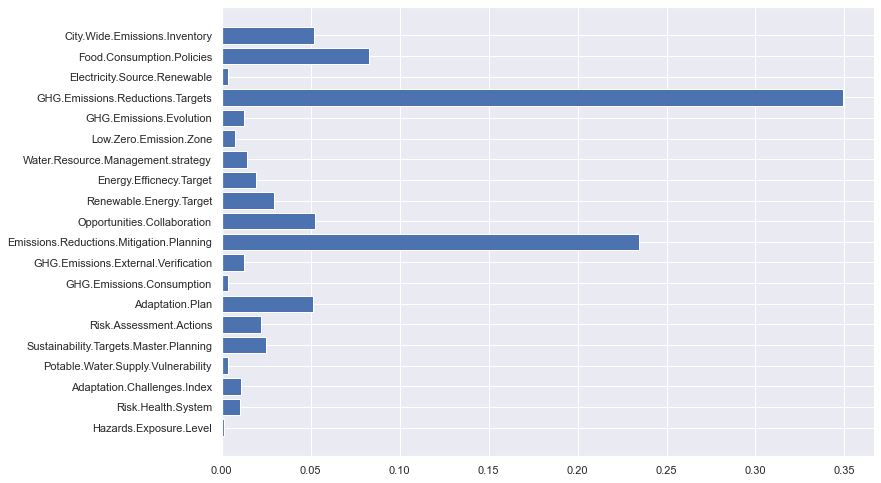

In [78]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy2)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.barh([x for x in range(len(importance))], importance, tick_label = X_dummy.columns)
plt.show()

### Feature selection according to features' importance when doing a PCA

#### We compute the PCA via the raw data that we encode again but we standard scale in difference to previously

In [79]:
data_for_pca = raw_index[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Level','Potable.Water.Supply.Percent', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory"]].copy()

In [80]:
data_for_pca['Potable.Water.Supply.Percent'] = data_for_pca['Potable.Water.Supply.Percent'].apply(cleanan)

In [81]:
data_for_pca['Potable.Water.Supply.Vulnerability'] = 100-data_for_pca['Potable.Water.Supply.Percent']

In [82]:
data_for_pca['Adaptation.Challenges.Level'] = data_for_pca['Adaptation.Challenges.Level'].apply(cleanan)

In [83]:
data_for_pca['Adaptation.Challenges.Index'] = data_for_pca['Adaptation.Challenges.Level'].apply(minmax_adaptation)

In [84]:
data_for_pca['Sustainability.Targets.Master.Planning'] = data_for_pca['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [85]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    data_for_pca[i] = data_for_pca[i].apply(note_sustainability_target)

In [86]:
data_for_pca['Low.Zero.Emission.Zone'] = data_for_pca['Low.Zero.Emission.Zone'].apply(note_low_food)

In [87]:
data_for_pca['Food.Consumption.Policies'] = data_for_pca['Food.Consumption.Policies'].apply(note_low_food)

In [88]:
data_for_pca['GHG.Emissions.Reductions.Targets'] = data_for_pca['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [89]:
data_for_pca['GHG.Emissions.Evolution'] = data_for_pca['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [90]:
data_for_pca['Electricity.Source.Renewable'] = data_for_pca['Electricity.Source.Renewable'].apply(cleanan)

In [91]:
data_for_pca['Risk.Health.System'] = data_for_pca['Risk.Health.System'].apply(note_low_food)

In [92]:
data_for_pca['Hazards.Exposure.Level'] = data_for_pca['Hazards.Exposure.Level'].apply(cleanan)

In [93]:
data_for_pca_mod = data_for_pca.drop(['Potable.Water.Supply.Percent', 'Adaptation.Challenges.Level'], axis = 1)

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(data_for_pca_mod)

#### Heatmap of the correlations within the original data that we encoded without the columns that we created

<AxesSubplot:>

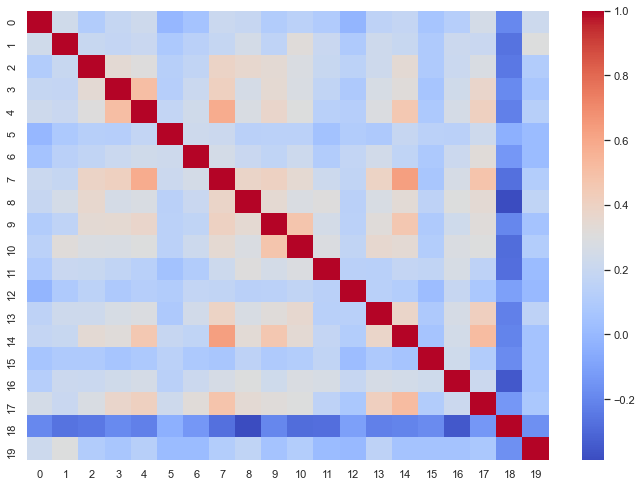

In [95]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

#### Beginning of the PCA

In [99]:
from sklearn.decomposition import PCA 
pca = PCA()
# find all Principal Components PC (no y!)
pca.fit(X)

PCA()

In [100]:
# Print the PCs (as rows)
# Expressed as linear combination of initial vector basis (13 columns) 
Wt = pd.DataFrame(pca.components_)

In [101]:
Xp = pca.transform(X) # Dataset expressed/projected in the new PC basis. ( eq. X.dot(Wt.T))
pd.DataFrame(Xp)

0         1         2         3         4         5         6   \
0   -2.296004  0.245013  0.998623 -0.373197 -0.702785 -1.076735  0.253874   
1    1.135524  2.036469 -2.171493  0.543892  1.364938 -1.858627  2.281776   
2   -1.122037  1.840439 -0.792015  1.787353  1.938663  2.123335  0.682977   
3    1.642495 -2.966457  0.261078 -1.236825 -0.101172 -0.127940 -1.311551   
4   -3.005103 -1.035429 -0.632681  2.023569  0.212001 -0.741163 -0.247793   
5   -3.782180  0.437196 -1.896498  0.281088 -1.648452  0.650500  1.330780   
6   -1.989506  1.247689 -1.090806 -0.272793  0.194948  1.837091 -0.276386   
7    1.784905  1.277409 -0.615003 -1.374090 -0.535784 -0.156817 -1.042592   
8   -1.417692 -1.045198  1.579071 -0.593873 -0.017745  0.021011  0.133558   
9   -2.650748  0.278998 -1.279646 -1.163196 -1.228539  0.494192 -0.370306   
10   0.688232 -0.395550  0.494430 -0.948720 -0.027469 -1.015354 -0.268138   
11   2.814906  0.794276 -0.512155 -0.940311 -0.173510  0.467372 -1.170006   
12   3.674021  1.826603 -1.185536  0.201304  0.847141 -0.435170 -0.696266   
13  -2.735942 -0.049968  0.185501  0.207216 -0.427973  0.668249  1.127545   
14   1.351311  1.429764  1.740789  0.758482 -1.391228 -0.552140 -1.206169   
15   4.724306  1.065273 -0.976153 -0.234614 -0.242888 -0.477415  1.240740   
16  -3.573951 -0.775975 -1.461397  1.379945 -0.489965 -1.050741  0.149842   
17  -2.219083  0.296658 -0.186655 -1.599424  0.259632 -0.228544 -0.075554   
18   2.848484 -1.151235  0.914367  0.625462  0.360229  1.121259  0.870572   
19  -3.137619 -0.232037 -1.251298  1.997144  0.396264 -0.690832 -1.098205   
20  -1.455065  0.188861  2.748250  2.168706 -2.337877 -0.671407 -0.656786   
21  -3.072142 -1.418593 -1.695528  1.959630 -1.366156  0.601679 -0.644493   
22   4.226591 -1.234133 -0.334228 -0.246926 -0.628563 -0.933658 -0.537427   
23  -0.489325 -0.053719  1.645755 -0.570349  0.524574  1.178284 -1.216046   
24  -3.084193  1.866769  3.553431  0.064526 -1.124848 -1.656985 -1.036145   
25  -4.050280  0.459788 -0.186051  2.349989 -0.298152 -1.248325 -0.417059   
26   3.184036 -0.937221  0.073285  0.390273 -1.044849 -1.697006  0.967591   
27   4.116730 -1.746805  0.192558  0.374241 -0.223674  0.332653  0.496189   
28  -2.077465  0.083886 -0.479045 -1.749137 -0.005501 -0.388888 -0.239083   
29  -2.234300 -0.276554 -1.184810 -1.292604  1.373125 -0.503924  0.691609   
..        ...       ...       ...       ...       ...       ...       ...   
536 -3.666253  0.252963 -0.300237  2.195876  0.776113 -0.147888 -0.173350   
537 -2.797957  0.087657  3.115987  1.314566 -1.359489 -0.126758  0.350031   
538 -0.253962  2.637944  1.524427 -0.634291  0.022298  1.005849 -0.571029   
539  2.037733  2.307044 -1.671023  0.134547  1.665982  0.329094  0.299591   
540 -1.437653 -0.460124  0.167827 -1.776378 -0.033310 -0.536050 -0.765139   
541 -1.859791 -0.378981  2.433802 -0.283794 -0.355131 -0.142785  0.371915   
542 -1.846410 -1.432161 -0.629440 -0.368090  0.861850 -0.945555 -1.697346   
543 -0.207409 -1.380111  0.574050  0.456251  1.603345 -0.760234 -0.561379   
544  2.518405  0.805998 -1.454941 -0.587268  0.086100  0.417557  0.343660   
545 -0.403781  0.143280 -1.522430 -1.138219 -0.430460  2.048611 -0.048686   
546  4.703086 -1.008909 -0.010212  0.301823 -0.411776  0.032122  0.340667   
547 -1.379290 -1.775735  0.001245 -0.390619  0.197907  0.026287  0.169857   
548  0.530411 -1.632063  0.055281 -0.650028  1.165031  0.377503 -0.564251   
549  1.194290  0.317677  0.072148  0.141244 -0.678885  0.451740  0.091431   
550  0.101269  0.056805  0.428037 -0.717593  0.423048 -0.470924 -0.641563   
551 -2.154018 -0.824341 -0.987475  0.999860  2.774521 -0.904723 -1.033488   
552 -0.182198 -2.177563 -0.298281 -0.598699  0.381571  0.531673 -0.098426   
553 -2.583759 -0.071814 -0.448741 -1.594603 -0.416562 -0.978163  0.674916   
554 -2.919393 -0.532638 -1.221782  0.872910  0.122637 -0.602662 -0.952685   
555  3.734253 -1.460698  0.050058  0.175099 -0.320069  0.156311 -0.345044   
556 -1.

#### Heatmap of the correlations of the vectors obtained via the PCA, everything is at 0 because we are in presence of eigenvectors. First check that our PCA is successful

<AxesSubplot:>

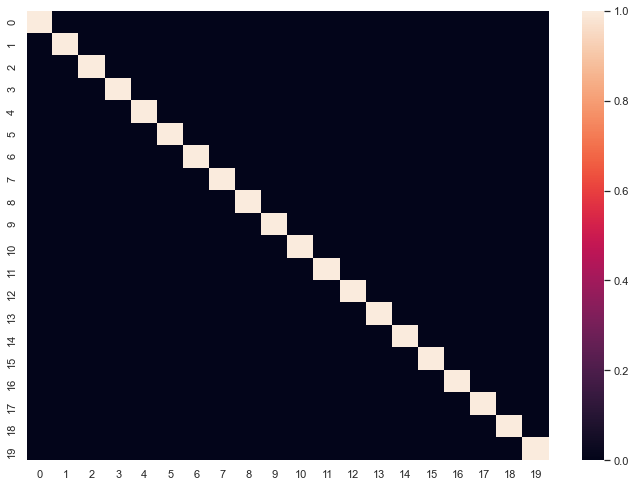

In [102]:
# As expected, the PCA reduces multicolinearity to its maximum! # (to the detriment of interpretability) 
sns.heatmap(pd.DataFrame(Xp).corr())

#### Second check that our PCA is successful

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.DataFrame()
df["vif_index"] = [vif(Xp, i) for i in range(Xp.shape[1])]

In [104]:
# Let's compute it
df_Xp = pd.DataFrame(Xp)
df_Xp.std()**2 / ((df_Xp.std()**2).sum())

0     0.271584
1     0.075264
2     0.066930
3     0.055247
4     0.050970
5     0.044633
6     0.044381
7     0.040645
8     0.040027
9     0.039393
10    0.036697
11    0.033410
12    0.032403
13    0.030586
14    0.028774
15    0.028373
16    0.023634
17    0.022747
18    0.019236
19    0.015064
dtype: float64

In [105]:
# Find principal components
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [106]:
# Sklearn provides it automatically 
pca.explained_variance_ratio_

array([0.27158394, 0.07526365, 0.06692975, 0.05524749, 0.05096979,
       0.04463301, 0.0443808 , 0.0406455 , 0.04002714, 0.03939304,
       0.03669709, 0.03341007, 0.03240332, 0.03058598, 0.0287742 ,
       0.02837319, 0.02363443, 0.02274702, 0.01923614, 0.01506445])

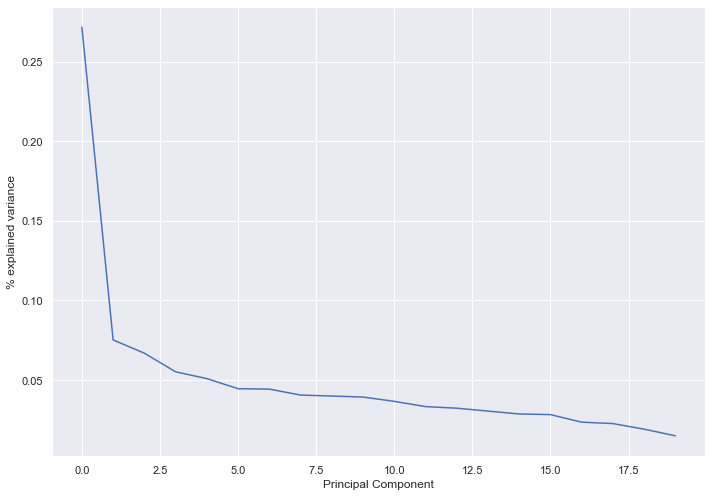

In [107]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

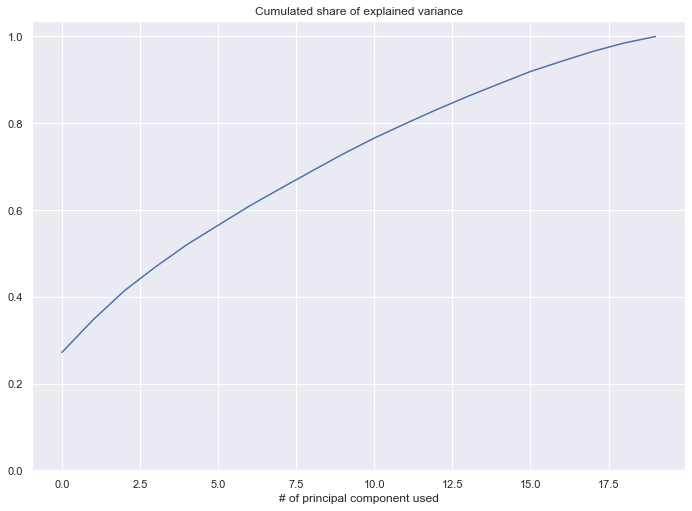

In [108]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.ylim(ymin=0)
plt.title('Cumulated share of explained variance') 
plt.xlabel('# of principal component used');

### PCA with only 2 principal components

In [111]:
pca2 = PCA(n_components=2).fit(X) # Print our 2 principal components
pd.DataFrame(pca2.components_)

0         1         2         3         4         5         6   \
0 -0.147131 -0.188760 -0.239930 -0.252137 -0.284703 -0.128717 -0.177787   
1  0.180938  0.351374 -0.027478 -0.172942 -0.222775 -0.163289 -0.112629   

         7         8         9         10        11        12        13  \
0 -0.318907 -0.262843 -0.267997 -0.262418 -0.177680 -0.115337 -0.247792   
1 -0.230315  0.184593 -0.124824  0.094737  0.296129  0.027054 -0.041541   

         14        15        16        17        18        19  
0 -0.295025 -0.099374 -0.218585 -0.279093  0.206467 -0.096889  
1 -0.259993  0.270046  0.236284 -0.238976 -0.401797  0.327764

In [112]:
Xp2 = pca2.fit_transform(X)
pd.DataFrame(Xp2)

0         1
0   -2.296061  0.244390
1    1.135424  2.021722
2   -1.121993  1.798493
3    1.642460 -2.952620
4   -3.005100 -1.074773
5   -3.782145  0.382518
6   -1.989415  1.114213
7    1.785066  1.245222
8   -1.417510 -1.094857
9   -2.650922  0.299521
10   0.688347 -0.421259
11   2.814855  0.846225
12   3.673933  1.827392
13  -2.735846 -0.006295
14   1.351296  1.474074
15   4.724365  1.089674
16  -3.573925 -0.771286
17  -2.219043  0.262174
18   2.848446 -1.151667
19  -3.137658 -0.216713
20  -1.455193  0.371683
21  -3.072340 -1.403299
22   4.226543 -1.245507
23  -0.489347  0.035010
24  -3.084324  2.042634
25  -4.050388  0.546774
26   3.183804 -0.916677
27   4.116748 -1.750033
28  -2.077397  0.040324
29  -2.234366 -0.284172
..        ...       ...
536 -3.666324  0.302819
537 -2.798033  0.249477
538 -0.254049  2.744552
539  2.037606  2.301853
540 -1.437458 -0.503106
541 -1.859740 -0.381471
542 -1.846488 -1.388323
543 -0.207220 -1.483207
544  2.518296  0.807826
545 -0.403770  0.123674
546  4.703018 -1.003326
547 -1.379317 -1.719542
548  0.530457 -1.650207
549  1.194191  0.238634
550  0.101406  0.005595
551 -2.154004 -0.852034
552 -0.182184 -2.133907
553 -2.583673 -0.124269
554 -2.919391 -0.536192
555  3.734122 -1.469551
556 -1.021498 -1.245450
557 -3.180199  0.614289
558  5.101622  0.490560
559  0.646210 -2.725933
560 -0.549517  0.574193
561 -2.597661  0.444456
562 -2.263474  1.203983
563  3.685637  0.345001
564  2.444402  2.033408
565  3.282824  0.694931

[566 rows x 2 columns]

In [113]:
X_reconstructed = pca2.inverse_transform(Xp2) 
X_reconstructed.shape

(566, 20)

### PCA with only 3 principal components

In [114]:
pca3 = PCA(n_components=3).fit(X) # Print our 3 principal components
pd.DataFrame(pca3.components_)

0         1         2         3         4         5         6   \
0 -0.147122 -0.188754 -0.239933 -0.252129 -0.284692 -0.128744 -0.177797   
1  0.185936  0.357251 -0.022406 -0.174517 -0.217192 -0.182730 -0.116483   
2  0.448635  0.199882 -0.031535  0.095284  0.150414 -0.228099 -0.202107   

         7         8         9         10        11        12        13  \
0 -0.318904 -0.262861 -0.267982 -0.262423 -0.177666 -0.115329 -0.247796   
1 -0.226818  0.184595 -0.116688  0.088248  0.297257  0.024057 -0.045106   
2  0.079791 -0.021832 -0.092395 -0.101480 -0.299331 -0.361747  0.084656   

         14        15        16        17        18        19  
0 -0.295016 -0.099346 -0.218586 -0.279095  0.206505 -0.096881  
1 -0.252994  0.281570  0.229416 -0.241602 -0.386562  0.333300  
2  0.080253 -0.281093 -0.274335  0.119045  0.023821  0.452152

### Analysis of our PCA results

In [115]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

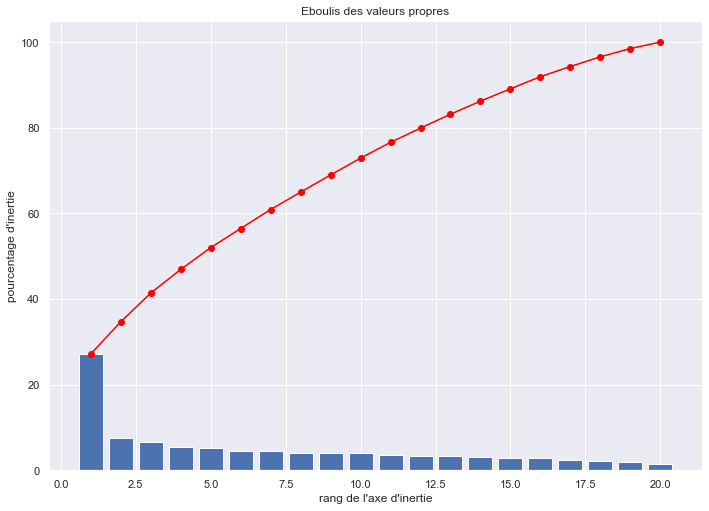

In [116]:
display_scree_plot(pca)

In [117]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(15,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey", alpha = 0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

## Correlation circle between principal components and the features

#### Correlation circle between second and third principal components and the features

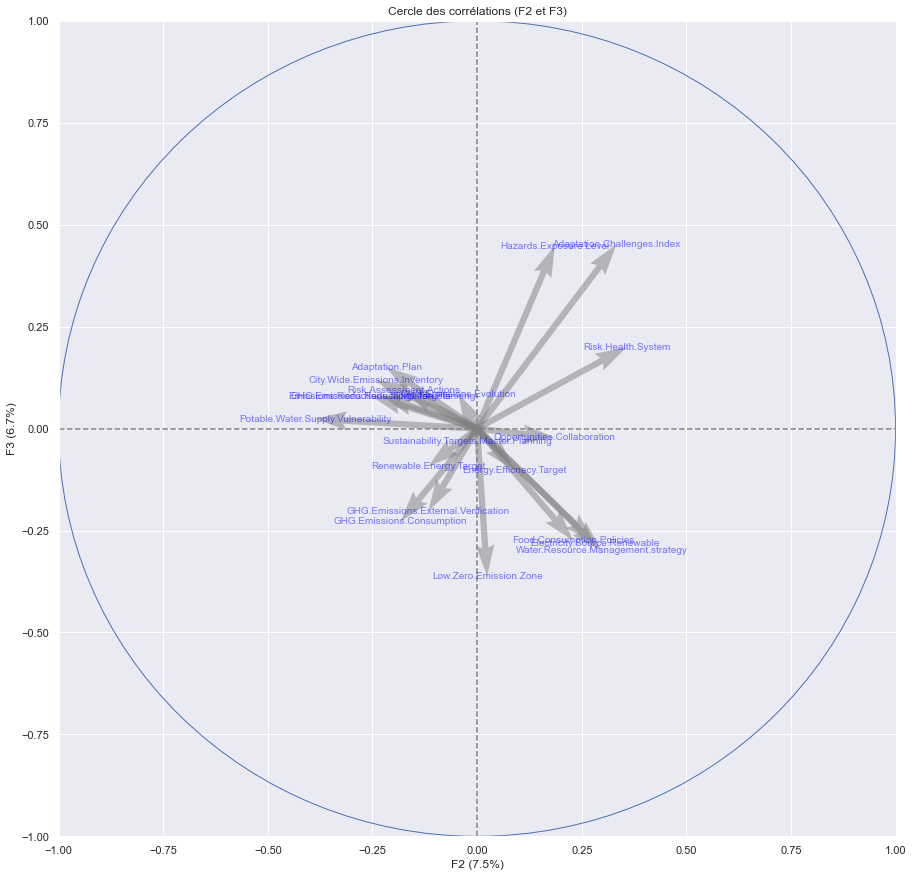

In [118]:
n_comp = 3
pcs = pca3.components_
display_circles(pcs, n_comp, pca3, [(1,2)], labels = np.array(data_for_pca_mod.columns))

#### Correlation circle between first and third principal components and the features

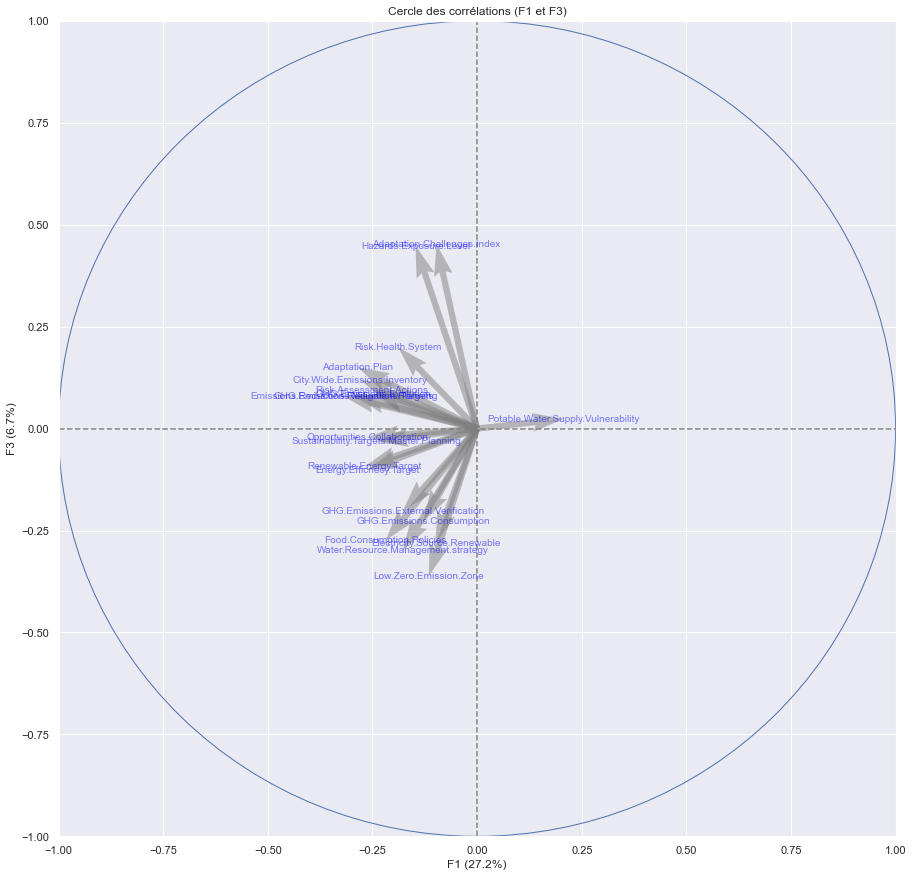

In [119]:
display_circles(pcs, n_comp, pca3, [(0,2)], labels = np.array(data_for_pca_mod.columns))

#### Correlation circle between first and second principal components and the features

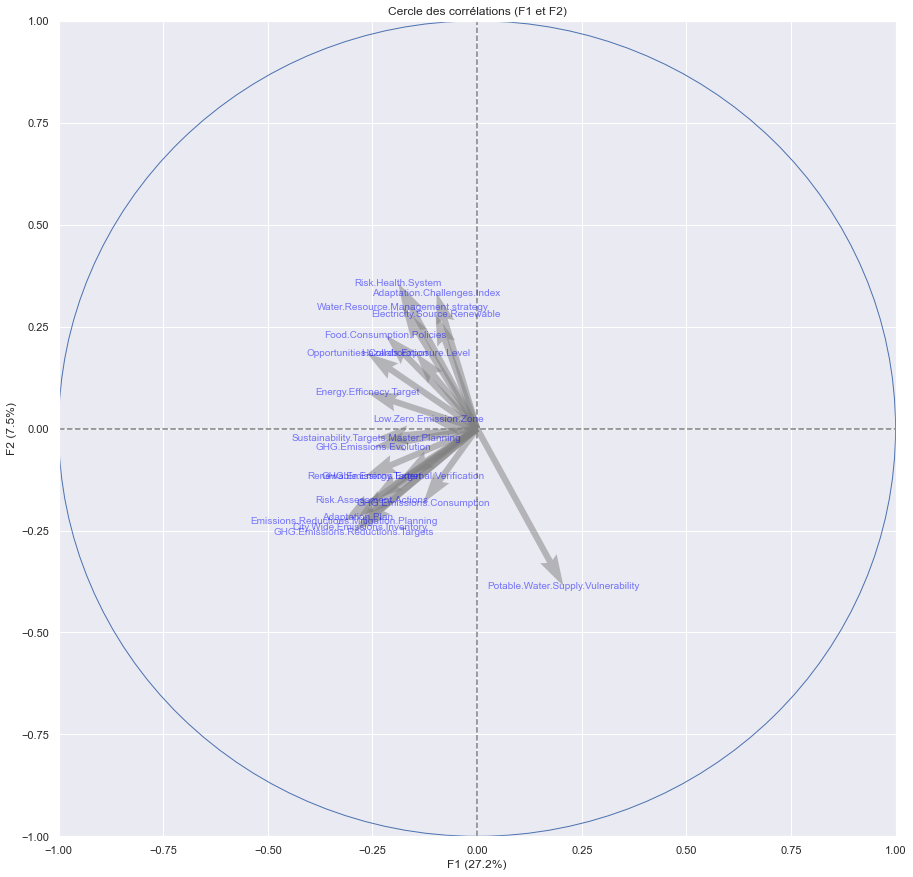

In [120]:
display_circles(pcs, n_comp, pca3, [(0,1)], labels = np.array(data_for_pca_mod.columns))

### Another form of PCA

In [121]:
scaler = StandardScaler()
Z = scaler.fit_transform(data_for_pca_mod)

In [122]:
acp = PCA(svd_solver='full')

In [126]:
#nombre d'observations
n = data_for_pca_mod.shape[0]
#nombre de variables
p = data_for_pca_mod.shape[1]
coord = acp.fit_transform(Z)
eigval = (n-1)/n*acp.explained_variance_

In [127]:
bs = 1/np.arange(p,0,-1) 
bs = np.cumsum(bs)
bs = bs[::-1]

In [128]:
di = np.sum(Z**2,axis=1)

In [129]:
cos2 = coord**2 
for j in range(p):
    #print(j)
    cos2[:,j] = cos2[:,j]/di 
#print(pd.DataFrame({'id':data_for_pca_mod.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2]}))

In [130]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
#print(pd.DataFrame({'id':data_for_pca_mod.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

In [131]:
sqrt_eigval = np.sqrt(eigval)

In [132]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
#print(corvar)

In [133]:
#Corrélation des variables avec les axes
cor_pca = pd.DataFrame({'id':data_for_pca_mod.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]})

In [134]:
cos2var = corvar**2 
# Qualité de représentation des variables
cos2var_pca = pd.DataFrame({'id':data_for_pca_mod.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2]})

In [135]:
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#Contribution des variables aux axes
contri = pd.DataFrame({'id':data_for_pca_mod.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3':ctrvar[:,2]})

In [136]:
# We create a column where we summup the contribution of each features for the first three principal components
contri['sum'] = contri['CTR_1']+contri['CTR_2']+contri['CTR_3']

In [137]:
# We create a ranking of each features according to the summup contribution to the first three principal components
sum_contri = pd.DataFrame(contri['sum'].rank(ascending = False))
sum_contri.index = contri.id
sum_contri

sum
id                                            
Hazards.Exposure.Level                     2.0
Risk.Health.System                         4.0
Sustainability.Targets.Master.Planning    20.0
Risk.Assessment.Actions                   15.0
Adaptation.Plan                            9.0
GHG.Emissions.Consumption                 13.0
GHG.Emissions.External.Verification       17.0
Emissions.Reductions.Mitigation.Planning   7.0
Opportunities.Collaboration               14.0
Renewable.Energy.Target                   16.0
Energy.Efficnecy.Target                   18.0
Water.Resource.Management.strategy         5.0
Low.Zero.Emission.Zone                    12.0
GHG.Emissions.Evolution                   19.0
GHG.Emissions.Reductions.Targets           8.0
Electricity.Source.Renewable              10.0
Food.Consumption.Policies                  6.0
City.Wide.Emissions.Inventory             11.0
Potable.Water.Supply.Vulnerability         3.0
Adaptation.Challenges.Index                1.0

In [138]:
# We create a ranking of each features according to the contribution to each of the first three principal components
rank_contri = pd.concat([contri['CTR_1'].rank(ascending = False),contri['CTR_2'].rank(ascending = False),contri['CTR_3'].rank(ascending = False)], axis = 1)
rank_contri.index = contri.id
#rank_contri

In [139]:
# We create a ranking of each features according to the correlation to each of the first three principal components
rank_cor = pd.concat([cor_pca['COR_1'].rank(ascending = False),cor_pca['COR_2'].rank(ascending = False),cor_pca['COR_3'].rank(ascending = False)], axis = 1)
rank_cor.index = cor_pca.id
rank_cor

COR_1  COR_2  COR_3
id                                                           
Hazards.Exposure.Level                      6.0    7.0    1.0
Risk.Health.System                          9.0    1.0    3.0
Sustainability.Targets.Master.Planning     11.0   10.0   11.0
Risk.Assessment.Actions                    13.0   15.0    6.0
Adaptation.Plan                            18.0   16.0    4.0
GHG.Emissions.Consumption                   5.0   14.0   16.0
GHG.Emissions.External.Verification         8.0   12.0   15.0
Emissions.Reductions.Mitigation.Planning   20.0   17.0    8.0
Opportunities.Collaboration                15.0    6.0   12.0
Renewable.Energy.Target                    16.0   13.0   13.0
Energy.Efficnecy.Target                    14.0    8.0   14.0
Water.Resource.Management.strategy          7.0    3.0   18.0
Low.Zero.Emission.Zone                      4.0    9.0   20.0
GHG.Emissions.Evolution                    12.0   11.0    9.0
GHG.Emissions.Reductions.Targets           19.0   19.0    7.0
Electricity.Source.Renewable                3.0    4.0   17.0
Food.Consumption.Policies                  10.0    5.0   19.0
City.Wide.Emissions.Inventory              17.0   18.0    5.0
Potable.Water.Supply.Vulnerability          1.0   20.0   10.0
Adaptation.Challenges.Index                 2.0    2.0    2.0

In [140]:
# We create a ranking of each features according to the quality of representation of the variables to each of the first three principal components
rank_co2var = pd.concat([cos2var_pca['COS2_1'].rank(ascending = False),cos2var_pca['COS2_2'].rank(ascending = False),cos2var_pca['COS2_3'].rank(ascending = False)], axis = 1)
rank_co2var.index = cos2var_pca.id
#rank_co2var

### SVM model for features selection according to our Targets

In [141]:
X_dummy = data_for_pca_mod.copy()
y_dummy1 = raw_index['City.Readiness.Index']
y_dummy2 = raw_index['Vulnerability']

#### SVM model for Readiness

In [142]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")

In [143]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv1 = RFECV(estimator=svr, step=1, cv=10,
              min_features_to_select=min_features_to_select)
rfecv1.fit(X_dummy, y_dummy1)

print("Optimal number of features : %d" % rfecv1.n_features_)

Optimal number of features : 12


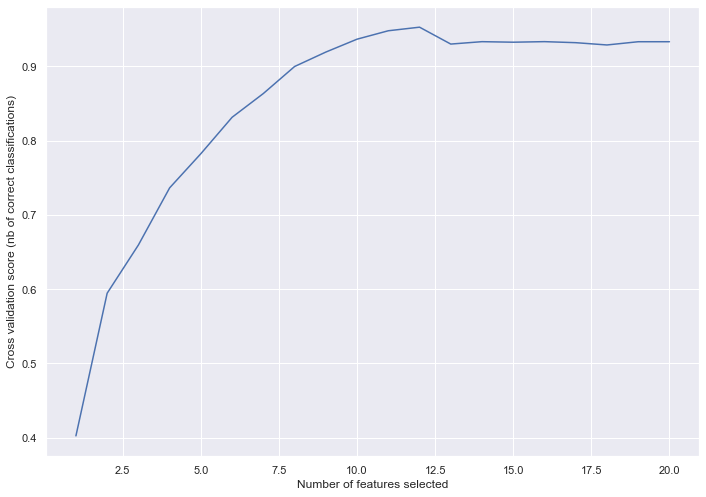

In [144]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select, len(rfecv1.grid_scores_) + min_features_to_select),rfecv1.grid_scores_)
plt.show()

In [145]:
rank_nico1 = pd.concat([pd.Series(X_dummy.columns),pd.Series(rfecv1.ranking_)], axis = 1)
rrank1 = rank_nico1.sort_values(1)

<BarContainer object of 20 artists>

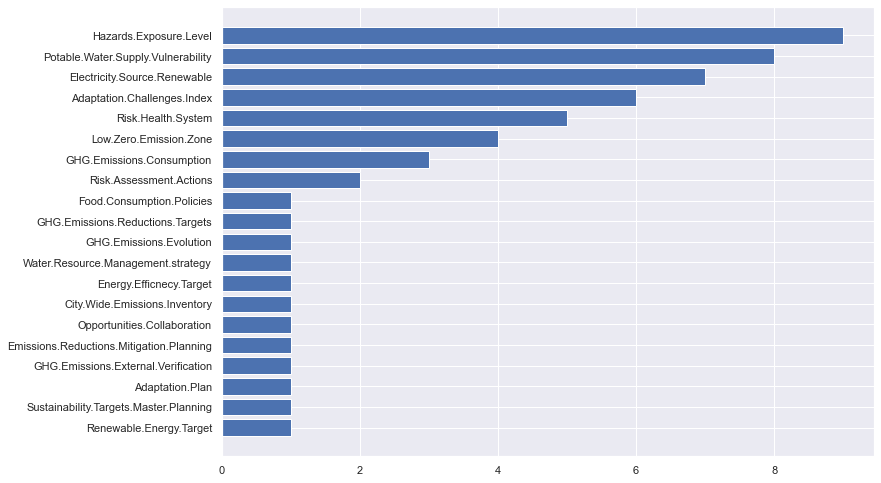

In [146]:
plt.barh(rrank1[0], rrank1[1])

##### When a feature is ranked at 1 so has the smallest bar on the above chart, it means that it is among the most important features to explain the target

#### SVM model for Vulnerability

In [147]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")

In [148]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svr, step=1, cv=10,
              min_features_to_select=min_features_to_select)
rfecv.fit(X_dummy, y_dummy2)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 20


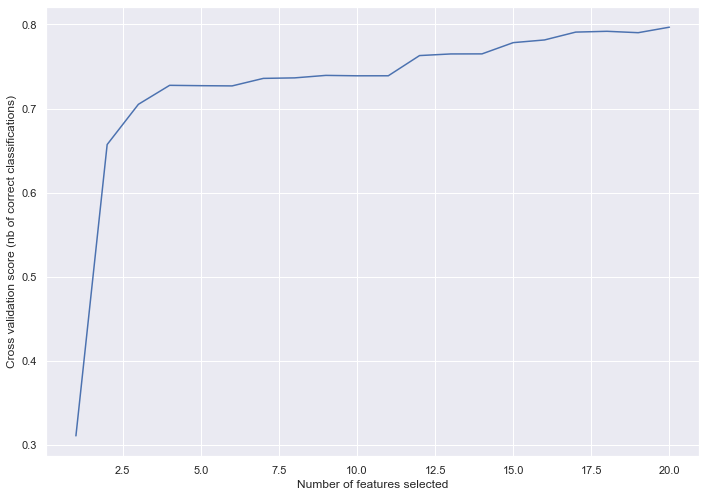

In [149]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,len(rfecv.grid_scores_) + min_features_to_select),rfecv.grid_scores_)
plt.show()

In [150]:
rank_nico2 = pd.concat([pd.Series(X_dummy.columns),pd.Series(rfecv.ranking_)], axis = 1)
rrank2 = rank_nico2.sort_values(1)

<BarContainer object of 20 artists>

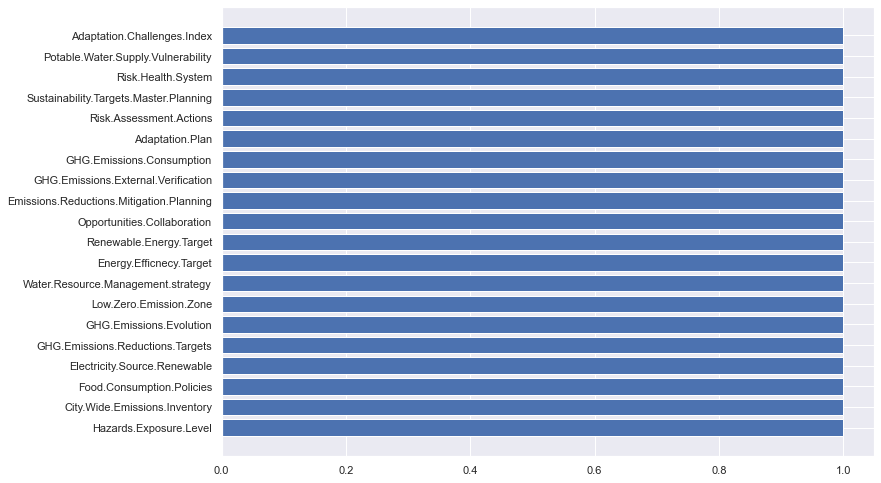

In [151]:
plt.barh(rrank2[0], rrank2[1])

##### When a feature is ranked at 1 so has the smallest bar on the above chart, it means that it is among the most important features to explain the target

# Pipeline and ML models

### We selected 10 features from our analysis to train our Machine Learning model on

In [152]:
col_to_use=[
'Hazards.Exposure.Level',
'Risk.Health.System',
'Adaptation.Plan',
'Emissions.Reductions.Mitigation.Planning',
'Water.Resource.Management.strategy',
'GHG.Emissions.Reductions.Targets',
'Food.Consumption.Policies',
'Potable.Water.Supply.Percent',
'Adaptation.Challenges.Level',
'Electricity.Source.Renewable']

In [153]:
class CustomScaler(TransformerMixin, BaseEstimator): 
# TransformerMixin generates a fit_transform method from fit and transform
# BaseEstimator generates get_params and set_params methods
    def __init__(self):
        pass
        
    
    
    def fit(self, X, y=None):
        self.means = X.mean()
        self.max = X.max()
        self.min = X.min()
        return self
    
    def transform(self, X, y=None):
        
        X= 100 - X
        X_transformed = (X - self.min)/(self.max-self.min) 
        # Return result as dataframe for integration into ColumnTransformer
        return pd.DataFrame(X_transformed)

### Selection of the data and splitting into train/test dataset

In [154]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Resilience']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)

In [156]:
numcol=['Hazards.Exposure.Level','Potable.Water.Supply.Percent','Adaptation.Challenges.Level','Electricity.Source.Renewable']

### Simple Linear Regression model

In [157]:
reg=LinearRegression()

customscaler = CustomScaler()

water_transform = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler)])

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('water_transformer', water_transform,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer,  make_column_selector(dtype_include=['object']))
    
    ])


final_pipel = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', reg)])

In [158]:
final_pipe_trained = final_pipel.fit(X_train,y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [159]:
cross_val_score(final_pipel, X_train, y_train, cv=10, scoring='r2')

array([0.76097295, 0.70777529, 0.71782829, 0.57615907, 0.6351908 ,
       0.83795725, 0.78465425, 0.7096418 , 0.7341888 , 0.86087859])

In [160]:
learning_curves_elements = pd.DataFrame(columns=['train_score', 'test_score', 'train_size'])
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)
X_train['target']= y_train
data_train = X_train.copy()

In [161]:
train_sizes = [10,50,100,200,300]
for size in train_sizes:
    
 # Sample the training set
    data_train_sample = data_train.sample(size, random_state = 1)
    #print(data_train_sample.drop(0, 1))
    # Prepare X and y
    X_train = data_train_sample.drop("target", 1)
    y_train = data_train_sample["target"]
    
    # Train the model on the sampled Train data
    model = final_pipel.fit(X_train,y_train)
    # Score the model on the train data (sampled) and test data (fixed)
    test_score =   model.score(X_test,y_test)
    train_score =  model.score(X_train,y_train)
    
    # Append associated train score, test score, and train size to dataframe
    learning_curves_elements = learning_curves_elements.append({'train_score': train_score,
                                  'test_score': test_score,
                                   'train_size': size}, ignore_index=True)

plt.plot(learning_curves_elements.train_size,learning_curves_elements.train_score,  color = 'red', label='train score')
plt.plot(learning_curves_elements.train_size,learning_curves_elements.test_score, color = 'blue', label='test score')
plt.title('Learning Curves')
plt.xlabel('Train size')
plt.ylabel('R2 score')
plt.legend()
plt.show()

### Ridge Regression model

In [162]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Resilience']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)

In [164]:
reg_ridge=Ridge()

customscaler_rid = CustomScaler()

water_transform_rid = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler_rid)])

num_transformer_rid = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer_rid = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor_rid = ColumnTransformer([
    ('water_transformer', water_transform_rid,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer_rid,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer_rid,  make_column_selector(dtype_include=['object']))
    
    ])


final_pipel_rid = Pipeline([
    ('preprocessing', preprocessor_rid),
    ('linear_regression', reg_ridge)])

In [165]:
ridge_trained = final_pipel_rid.fit(X_train,y_train)

In [166]:
cross_val_score(final_pipel_rid, X_train, y_train, cv=10, scoring='r2')

array([0.75891349, 0.70729868, 0.71788696, 0.58832574, 0.64480173,
       0.83490778, 0.78303977, 0.71339609, 0.73568635, 0.8650454 ])

In [167]:
from IPython.display import Image


<img src="https://kitt.lewagon.com/karr/data-lectures.kitt/img/machine-learning/pipeline-diagram.png">

## Nearest Neighbors model

In [168]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Resilience']
X =X[col_to_use]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [169]:
Nn = NearestNeighbors(n_neighbors=3)

#### Test with a made-up city

In [170]:
pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)
pred = pd.DataFrame(data=pred,columns=col_to_use)
pred[numcol] = pred[numcol].apply(pd.to_numeric, errors = 'coerce')

In [171]:
customscalerN = CustomScaler()

water_transformN = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscalerN)])

num_transformerN = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformerN = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessorN = ColumnTransformer([
    ('water_transformer', water_transformN,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformerN,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformerN,  make_column_selector(dtype_include=['object']))
    
    ])
  

nearest = Pipeline([
    ('preprocessing', preprocessorN),
    
    ('knn', Nn)
])


In [172]:
nearest_trained = nearest.fit(X)
nearest_scale=nearest_trained.steps[0][1].transform(pred)

In [173]:
voisin = nearest_trained.steps[1][1].kneighbors(nearest_scale,n_neighbors=5)
ville_voisine = voisin[1][0]

In [174]:
raw_index.iloc[ville_voisine]

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
216         237                  2020          826103   
144         158                  2020           60374   
475         515                  2020           35878   
158         173                  2020           54111   
37           41                  2020           43911   

                          Organization               City  \
216  Ayuntamiento de Casimiro Castillo  Casimiro Castillo   
144                 Alcaldía de Ibagué             Ibagué   
475                 City of Sacramento         Sacramento   
158                  City of Iowa City          Iowa City   
37                      City of Ottawa             Ottawa   

                      Country     CDP.Region First.Time.Discloser  Population  \
216                    Mexico  Latin America                   No     21475.0   
144                  Colombia  Latin America                   No    564077.0   
475  United States of America  North America                   No    513624.0   
158  United States of America  North America                   No     76290.0   
37                     Canada  North America                   No    991429.0   

                City.Location Sustainability.Targets.Master.Planning  \
216  POINT (-104.436 19.6031)                            In progress   
144    POINT (-75.24 4.44851)                                    Yes   
475  POINT (-121.494 38.5816)                                    Yes   
158  POINT (-91.5302 41.6611)                                    Yes   
37   POINT (-75.6972 45.4215)                                    Yes   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
216                                         Yes              1.0   
144  Intending to undertake in the next 2 years              3.0   
475                                 In progress              5.0   
158                                         Yes             10.0   
37                                  In progress              4.0   

     Hazards.Exposure.Level  Adaptation.Challenges.Health  \
216                    25.0                           NaN   
144                    40.0                           NaN   
475                    59.0                           NaN   
158                   133.0                           NaN   
37                     90.0                           NaN   

     Adaptation.Challenges.Economic  Adaptation.Challenges.Environment  \
216                             NaN                                NaN   
144                             NaN                                NaN   
475                             NaN                                NaN   
158                             NaN                                NaN   
37                              NaN                                NaN   

     Adaptation.Challenges.Infrastructure  Adaptation.Challenges.Social  \
216                                   NaN                           NaN   
144                                   NaN                           NaN   
475                                   NaN                           NaN   
158                                   NaN                           NaN   
37                                    NaN                           NaN   

     Adaptation.Challenges.Governance  Adaptation.Challenges.Education  \
216                               NaN                              NaN   
144                               NaN                              NaN   
475                               NaN                              NaN   
158                               NaN                              NaN   
37                                NaN                              NaN   

     Adaptation.Challenges.Level Risk.Health.System  Nb.Adaptation.Actions  \
216                          NaN                NaN                      1   
144                          NaN                NaN                      3   
475                     

In [175]:
m = folium.Map(location=[ 43.3,  5.4],zoom_start=zoom_start)

In [176]:
df = raw_index.copy()
for i in ville_voisine:
    icity= df.iloc[i]
    lat=icity[55]
    lon=icity[56]
    txt=f'readiness score:{icity[58]} \n vulnerability score:{icity[59]} \n Orga:{icity[3]}'
    print(txt)
    #folium.Marker(
    folium.CircleMarker(
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
    radius=5,
    color="green",
    fill=True,
    fill_color='gray'
    ).add_to(m)

readiness score:0.2708333333333333 
 vulnerability score:0.1903409090909091 
 Orga:Ayuntamiento de Casimiro Castillo
readiness score:0.5 
 vulnerability score:0.04954545454545454 
 Orga:Alcaldía de Ibagué
readiness score:0.6822916666666666 
 vulnerability score:0.22253787878787878 
 Orga:City of Sacramento
readiness score:0.587125 
 vulnerability score:0.2926136363636364 
 Orga:City of Iowa City
readiness score:0.47916666666666663 
 vulnerability score:0.2518939393939394 
 Orga:City of Ottawa


In [177]:
m